In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn import metrics
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Advt=pd.read_csv("C:/Users/Vishal/Desktop/Python/Linear Regression/Case Study - Marketing Example/Advertising_data.csv")

Advt.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
print("Filtering the relevent columns")


Advt=Advt[['TV','Radio','Newspaper','Sales']]

Advt.head()

Filtering the relevent columns


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
pandas_profiling.ProfileReport(Advt)

In [5]:
def Summar(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),x.quantile(0.01),x.quantile(0.05),x.quantile(0.1),x.quantile(0.25),x.quantile(0.5),x.quantile(0.75),x.quantile(0.9),x.quantile(0.95),x.quantile(0.99),x.max()],
                    index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

Advt.apply(lambda x: Summar(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
TV,200.0,0.0,29408.5,147.0425,149.75,85.854236,7370.949893,0.7,5.387,13.195,24.88,74.375,149.75,218.825,261.44,280.735,292.907,296.4
Radio,200.0,0.0,4652.8,23.2640,22.90,14.846809,220.427743,0.0,0.399,1.995,3.40,9.975,22.90,36.525,43.52,46.810,49.400,49.6
Newspaper,200.0,0.0,6110.8,30.5540,25.75,21.778621,474.308326,0.3,0.999,3.600,5.99,12.750,25.75,45.100,59.07,71.825,89.515,114.0
Sales,200.0,0.0,2804.5,14.0225,12.90,5.217457,27.221853,1.6,4.784,6.600,7.96,10.375,12.90,17.400,21.71,23.800,25.507,27.0


In [6]:
Advt['Sales'].clip(lower=Advt['Sales'].quantile(0.01),upper=Advt['Sales'].quantile(0.99),inplace=True)

Advt['Radio'].clip(lower=Advt['Radio'].quantile(0.01),upper=Advt['Radio'].quantile(0.99),inplace=True)

Advt['Newspaper'].clip(lower=Advt['Newspaper'].quantile(0.01),upper=Advt['Newspaper'].quantile(0.99),inplace=True)

Advt['TV'].clip(lower=Advt['TV'].quantile(0.01),upper=Advt['TV'].quantile(0.99),inplace=True)

In [7]:
Advt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
print("As the data has no missing values it won't be treated")

As the data has no missing values it won't be treated


In [9]:
print("In order to check if the variables have a normal distribution")

In order to check if the variables have a normal distribution


To show the distribution of Sales


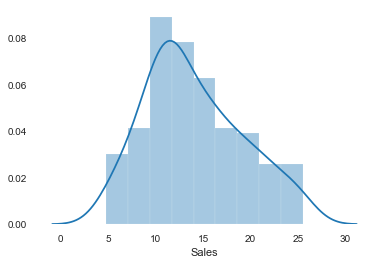

In [10]:
print("To show the distribution of Sales")

sns.distplot(Advt.Sales)

To show the distribution of TV


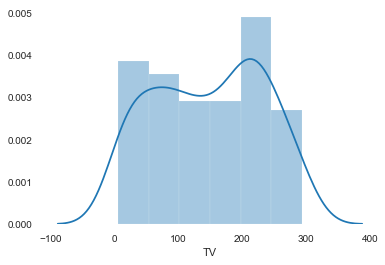

In [11]:
print("To show the distribution of TV")

sns.distplot(Advt.TV)

To show the distribution of Newspaper


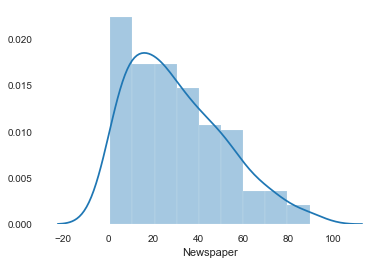

In [12]:
print("To show the distribution of Newspaper")

sns.distplot(Advt.Newspaper)

To show the distribution of Radio


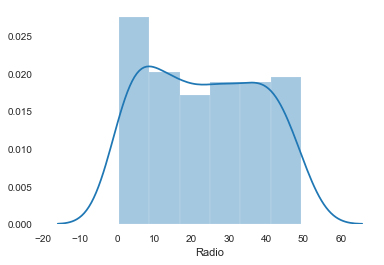

In [13]:
print("To show the distribution of Radio")

sns.distplot(Advt.Radio)

In [14]:
print("On analysing the graphs we can infer that on Sales has somewhat normal distribution while other dont")

On analysing the graphs we can infer that on Sales has somewhat normal distribution while other dont


In [15]:
print("Now we'll be chencking the scatter plot of Sales vs independent variables to see the co-relation between the two")

Now we'll be chencking the scatter plot of Sales vs independent variables to see the co-relation between the two


Scatter Plot for Tv and Sales

Seeing the graph we can say the two have a strong correlation


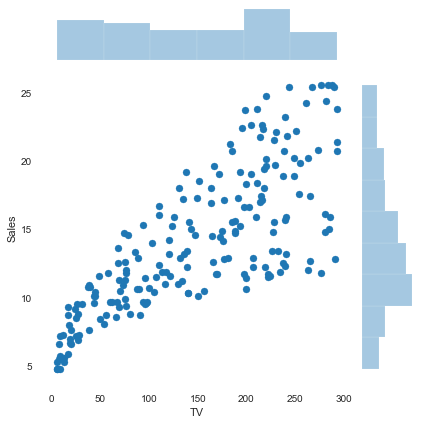

In [16]:
print("Scatter Plot for Tv and Sales")

sns.jointplot(Advt.TV,Advt.Sales)

print("\nSeeing the graph we can say the two have a strong correlation")

Scatter Plot for Newspaper and Sales

Seeing the graph we can say the two donot have a strong correlation


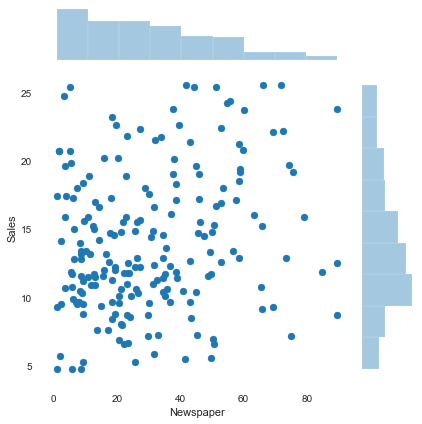

In [17]:
print("Scatter Plot for Newspaper and Sales")

sns.jointplot(Advt.Newspaper,Advt.Sales)

print("\nSeeing the graph we can say the two donot have a strong correlation")

Scatter Plot for Radio and Sales

Seeing the graph we can say the two donot have a strong correlation it's somewhat in the middle


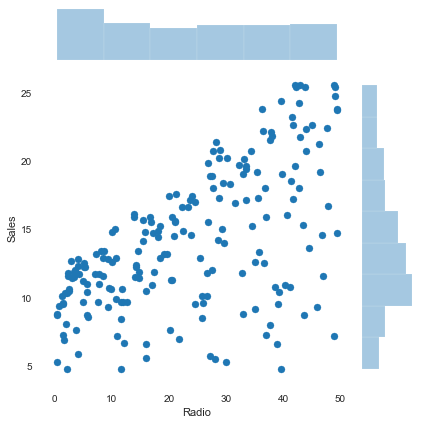

In [18]:
print("Scatter Plot for Radio and Sales")

sns.jointplot(Advt.Radio,Advt.Sales)

print("\nSeeing the graph we can say the two donot have a strong correlation it's somewhat in the middle")

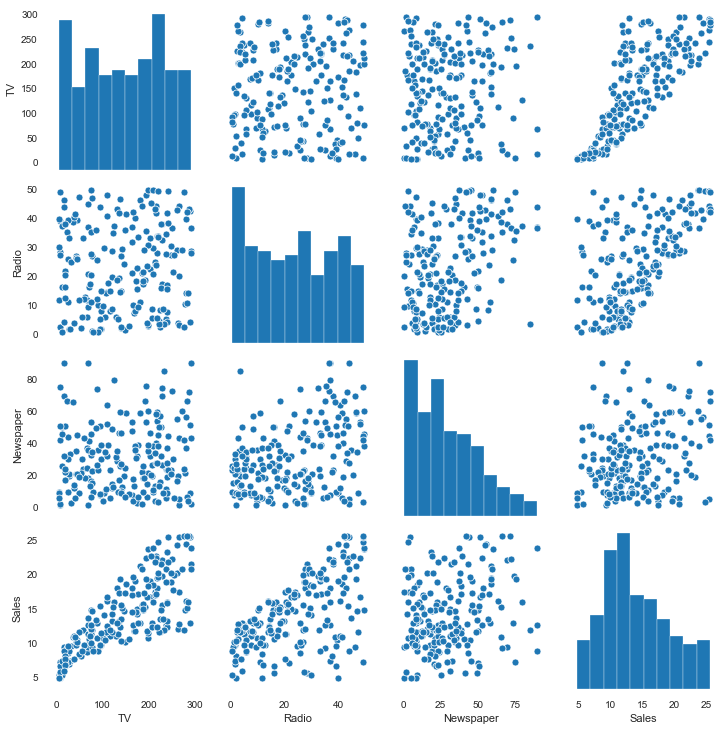

In [19]:
sns.pairplot(Advt)

In [20]:
print("Seeing the graphs we can assume that the Sales is somewhat dependent on TV and Radio")

Seeing the graphs we can assume that the Sales is somewhat dependent on TV and Radio


In [21]:
Advt.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054758,0.058259,0.782085
Radio,0.054758,1.000000,0.356221,0.583285
Newspaper,0.058259,0.356221,1.000000,0.227594
Sales,0.782085,0.583285,0.227594,1.000000


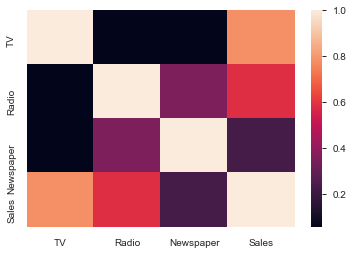

In [22]:
sns.heatmap(Advt.corr())

In [23]:
print("Seeing the heatmap we can conclude that the Sales is dependent on TV and Radio and thus our model will have the two in them")

Seeing the heatmap we can conclude that the Sales is dependent on TV and Radio and thus our model will have the two in them


In [24]:
Lm=smf.ols('Sales~TV+Radio',Advt).fit()

print(Lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     934.3
Date:                Wed, 08 Apr 2020   Prob (F-statistic):          2.96e-101
Time:                        01:44:05   Log-Likelihood:                -375.81
No. Observations:                 200   AIC:                             757.6
Df Residuals:                     197   BIC:                             767.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0306      0.280     10.832      0.0

In [25]:
print("Seeing the summary we can connclude that\n 1. The model can be accedpted as the R-sq is high and also the F value is also high \n 2. We can also accept the model as the P values are significant")

Seeing the summary we can connclude that
 1. The model can be accedpted as the R-sq is high and also the F value is also high 
 2. We can also accept the model as the P values are significant


In [26]:
print("Now predicting the values and the finding the Error whih should be as small as possible")

Now predicting the values and the finding the Error whih should be as small as possible


In [27]:
Lmpredit=Lm.predict({'TV':Advt.TV,'Radio':Advt.Radio})

Lmpredit[0:10]

0    20.512548
1    12.420727
2    12.428853
3    17.623874
4    13.216394
5    12.608910
6    11.786222
7    12.135413
8     3.813074
9    12.533245
dtype: float64

In [28]:
print("Calculating the error")

mse=metrics.mean_squared_error(Advt.Sales,Lmpredit)

rmse=np.sqrt(mse)

rmse

Calculating the error


1.5842400501785758

In [29]:
print("Seeing the value of Root mean sq error we can say that our model is acceptable as the alue of RMSE is very less")

Seeing the value of Root mean sq error we can say that our model is acceptable as the alue of RMSE is very less


Plotting the residuals


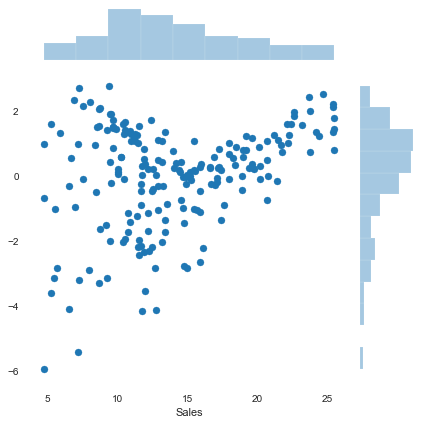

In [30]:
print("Plotting the residuals")

Lm.resid[1:10]

sns.jointplot(Advt.Sales,Lm.resid)

In [31]:
print("For linear model we assume that the error should be normal and randomly distributed as it is not in this case even though our R-sq value is high we conclude that our model is over fit")

For linear model we assume that the error should be normal and randomly distributed as it is not in this case even though our R-sq value is high we conclude that our model is over fit
